# Assignment: Trees
Do three questions.

In [3]:
! git clone https://github.com/KaranRawatUVA/trees

Cloning into 'trees'...
remote: Enumerating objects: 119, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 119 (delta 14), reused 5 (delta 5), pack-reused 102 (from 1)
Receiving objects: 100% (119/119), 74.45 MiB | 13.10 MiB/s, done.
Resolving deltas: 100% (26/26), done.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier # Import the tree classifier
from sklearn.tree import plot_tree # Plot the tree


**Q1.** Please answer the following questions in your own words.

1. How are trees constructed?
2. How do trees handle non-linear relationships between variables? Compare this to linear models.

    Trees do not assume that relationships are linear unlike linear models. It also can handle them with piecewise functions. They are also based on the values of the data set. Linear models deal with non-linear relationships with transformation.  

3. Why is the Gini a good loss function for categorical target variables?
    Gini is good for categorical target variables because, we can split the gini curves into the different categories. It is sensetive to be categorized.

4. Why do trees tend to overfit, and how can this tendency be constrained?

    Trees tend to overfit because it can theoretically keep fitting itself to the data until each leaf fits a specific observation. This tendency can be restrained by: having a depth restriction, don't let the nodes be too pure by having a lower bound, and don't make the nodes too small.

5. True or false, and explain: Trees only really perform well in situations with lots of categorical variables as features/covariates.

    False, the trees can handle other variables that are not categorical variables. It can handle this with > and <, which would categorize them.  

6. Why don't most versions of classification/regression tree concept allow for more than two branches after a split?

    Most versions do not allow past two branches because it makes it easier to read with only 2. It also prevents overfitting which could happen if you allowed unlimited branches.

7. What are some heuristic ways you can examine a tree and decide whether it is probably over- or under-fitting?

    If it is a very tall tree it is overfitting. If it is very short, it is underfitting. It is also helpful to check on its error values and r^2.

1.     The algo looks at values that can split the data into two groups (node) that are as different from each other as possible based on values and keeps doing this until it reaches the leaf (multiple by the end of it)


2. Trees do not assume that relationships are linear unlike linear models. It also can handle them with piecewise functions. They are also based on the values of the data set. Linear models deal with non-linear relationships with transformation.  

3. Gini is good for categorical target variables because, we can split the gini curves into the different categories. It is sensetive to be categorized.

4. Trees tend to overfit because it can theoretically keep fitting itself to the data until each leaf fits a specific observation. This tendency can be restrained by: having a depth restriction, don't let the nodes be too pure by having a lower bound, and don't make the nodes too small.

5. False, the trees can handle other variables that are not categorical variables. It can handle this with > and <, which would categorize them.  

6. Most versions do not allow past two branches because it makes it easier to read with only 2. It also prevents overfitting which could happen if you allowed unlimited branches.

7. If it is a very tall tree it is overfitting. If it is very short, it is underfitting. It is also helpful to check on its error values and r^2.

**Q2.** This is a case study on regression and classification trees.

1. Load `./data/cars_hw.csv`. How many observations and features/covariates/variables? What are the available variables? Take a look at the first few rows of data.

2. For the categorical variables `Make`, `Color`, `Body_type`, `No_of_Owners`, `Fuel_Type`, `Transmission`, and `Transmission_Type`, create dummy/one-hot-encoded representations. For numeric variables, we'll use `Mileage_Run`, `Make_Year`, and `Seating_Capacity`. Our target variable will be `Price`. Make a train-test split of your data.

3. From `sklearn.tree`, import the `DecisionTreeRegressor` and `plot_tree`. Use a train-test split to iterate over possible values for `min_samples_leaf`, computing the $R^2$ for each value between 1 and 25. What choice achieves the highest $R^2$ on the test data?

4. For the optimal `min_samples_leaf` from 3, regress price on the rest of the features/covariates using the training data. What is your $R^2$ and RMSE on the test set? Plot the dendrogram. Plot the residuals. Is the density of residuals symmetric and centered around 0?

4. Run a linear regression of price on the same variables. Which model -- regression tree or linear regression -- performs better on the test set? Why?

5. Predict prices using both your tree and your linear model, and make a scatter plot of their values. Describe what you see.

**Q3.** This is a case study about classification and regression trees.

1. Load the `Breast Cancer METABRIC.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  We'll use a consistent set of feature/explanatory variables. For numeric variables, we'll include `Tumor Size`, `Lymph nodes examined positive`, `Age at Diagnosis`. For categorical variables, we'll include `Tumor Stage`, `Chemotherapy`, and `Cancer Type Detailed`. One-hot-encode the categorical variables and concatenate them with the numeric variables into a feature/covariate matrix, $X$.

3. Let's predict `Overall Survival Status` given the features/covariates $X$. There are 528 missing values, unfortunately: Either drop those rows from your data or add them as a category to predict. Constrain the minimum samples per leaf to 10. Print a dendrogram of the tree. Print a confusion matrix of the algorithm's performance. What is the accuracy?

4. For your model in part three, compute three statistics:
    - The **true positive rate** or **sensitivity**:
        $$
        TPR = \dfrac{TP}{TP+FN}
        $$
    - The **true negative rate** or **specificity**:
        $$
        TNR = \dfrac{TN}{TN+FP}
        $$
    Does your model tend to perform better with respect to one of these metrics?

5. Let's predict `Overall Survival (Months)` given the features/covariates $X$. Use the train/test split to pick the optimal `min_samples_leaf` value that gives the highest $R^2$ on the test set (it's about 110). What is the $R^2$? Plot the test values against the predicted values. How do you feel about this model for clinical purposes?

In [7]:
# 1
df3 = pd.read_csv('/content/trees/assignment/data/Breast Cancer METABRIC.csv')
display(df3.shape) # (2509 observations, 34 columns)
df3.head()

(2509, 34)

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,MB-0000,75.65,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,No,claudin-low,1.0,Positve,...,Living,Negative,Yes,138.65,Not Recurred,Female,ER-/HER2-,22.0,2.0,Living
1,MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,...,Living,Positive,Yes,83.52,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1.0,Living
2,MB-0005,48.87,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,No,151.28,Recurred,Female,NaN,15.0,2.0,Died of Disease
3,MB-0006,47.68,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Yes,LumB,1.0,Positve,...,Living,Positive,Yes,162.76,Not Recurred,Female,NaN,25.0,2.0,Living
4,MB-0008,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,Yes,18.55,Recurred,Female,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


In [28]:
# 2
df3 = df3.dropna()
df3 = df3[df3['Overall Survival Status'] != 0]

numeric_features = ['Tumor Size', 'Lymph nodes examined positive', 'Age at Diagnosis']
categorical_features = ['Tumor Stage', 'Chemotherapy', 'Cancer Type Detailed']

# Dummy Var
X_d = pd.get_dummies(df3[categorical_features[0]],dtype='int') # Create brand dummies

X_d2 = pd.get_dummies(df3[categorical_features[1]],dtype='int') # Create brand dummies


X_d3 = pd.get_dummies(df3[categorical_features[2]],dtype='int') # Create brand dummies

X = pd.concat([df3[numeric_features] ,X_d, X_d2, X_d3], axis=1) # Concatenate engineered features
X.head()




,Tumor Size,Lymph nodes examined positive,Age at Diagnosis,0.0,1.0,2.0,3.0,4.0,0,No,Yes,Breast,Breast Angiosarcoma,Breast Invasive Ductal Carcinoma,Breast Invasive Lobular Carcinoma,Breast Invasive Mixed Mucinous Carcinoma,Breast Mixed Ductal and Lobular Carcinoma,Invasive Breast Carcinoma,Metaplastic Breast Cancer
0,22.0,10.0,75.65,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
1,10.0,0.0,43.19,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,15.0,1.0,48.87,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
3,25.0,3.0,47.68,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
4,40.0,8.0,76.97,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0


,Tumor Size,Lymph nodes examined positive,Age at Diagnosis,0.0,1.0,2.0,3.0,4.0,0,No,Yes,Breast,Breast Angiosarcoma,Breast Invasive Ductal Carcinoma,Breast Invasive Lobular Carcinoma,Breast Invasive Mixed Mucinous Carcinoma,Breast Mixed Ductal and Lobular Carcinoma,Invasive Breast Carcinoma,Metaplastic Breast Cancer
0,22.0,10.0,75.65,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
1,10.0,0.0,43.19,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,15.0,1.0,48.87,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
3,25.0,3.0,47.68,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
4,40.0,8.0,76.97,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1980,25.0,1.0,43.10,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
1981,20.0,1.0,42.88,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
1982,25.0,45.0,62.90,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
1983,25.0,12.0,61.16,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


[Text(0.6275058962264151, 0.9722222222222222, 'Age at Diagnosis <= 64.59\ngini = 0.488\nsamples = 1981\nvalue = [1144, 837]'),
 Text(0.42859669811320755, 0.9166666666666666, 'Lymph nodes examined positive <= 4.5\ngini = 0.495\nsamples = 1148\nvalue = [519, 629]'),
 Text(0.5280512971698113, 0.9444444444444444, 'True  '),
 Text(0.29870283018867927, 0.8611111111111112, 'Age at Diagnosis <= 58.315\ngini = 0.485\nsamples = 1008\nvalue = [417, 591]'),
 Text(0.1929245283018868, 0.8055555555555556, 'Tumor Size <= 27.5\ngini = 0.464\nsamples = 686\nvalue = [251.0, 435.0]'),
 Text(0.1311320754716981, 0.75, 'Lymph nodes examined positive <= 1.5\ngini = 0.43\nsamples = 514\nvalue = [161, 353]'),
 Text(0.08867924528301886, 0.6944444444444444, 'Age at Diagnosis <= 52.5\ngini = 0.41\nsamples = 435\nvalue = [125.0, 310.0]'),
 Text(0.06415094339622641, 0.6388888888888888, 'Age at Diagnosis <= 49.995\ngini = 0.378\nsamples = 281\nvalue = [71, 210]'),
 Text(0.03773584905660377, 0.5833333333333334, 'Age a

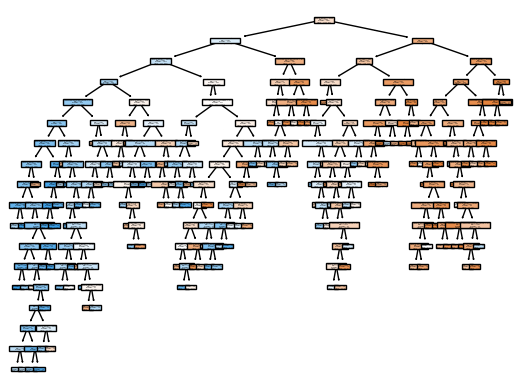

In [42]:
# 3

y = pd.get_dummies(df3["Overall Survival Status"],dtype='int') # Create brand dummies

y = y['Living']
display(X)

X.columns = X.columns.astype(str)


cart = DecisionTreeClassifier(min_samples_leaf=10)
cart = cart.fit(X, y)

# Visualize results:
var_names = cart.feature_names_in_
plot_tree(cart,filled=True,feature_names=var_names)




array([[937, 207],
       [267, 570]])

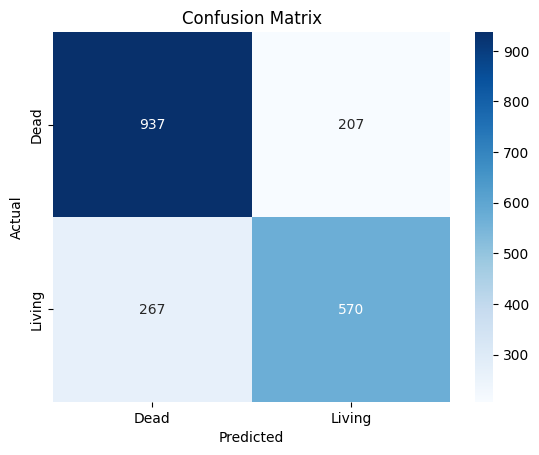

Accuracy: 0.76


In [45]:
from sklearn.metrics import confusion_matrix, accuracy_score


y_pred = cart.predict(X)

# Compute confusion matrix
cm = confusion_matrix(y, y_pred)

display(cm)

# Display confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Dead', 'Living'], yticklabels=['Dead', 'Living'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate accuracy
accuracy = accuracy_score(y, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# got help from chat gpt for this block

# Accuracy: 0.76

4:

TPR = 937 / (937 + 207) = 0.81905594405

TNR = 570 / (570 + 267) = 0.68100358422

It is a lot better at TPR

Best R^2: 0.1339 with min_samples_leaf = 121


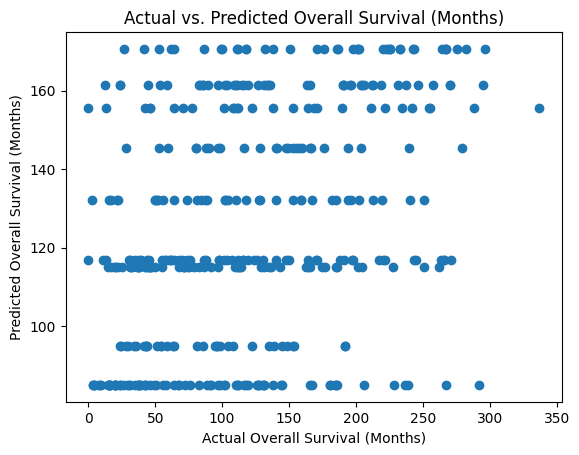

In [48]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# 5.
X = X.astype(float)
y_reg = df3['Overall Survival (Months)']

X_train, X_test, y_train, y_test = train_test_split(X, y_reg, test_size=0.2, random_state=42)

best_r2 = -1
best_min_samples_leaf = 0

for min_samples in range(1, 1000):
    regressor = DecisionTreeRegressor(min_samples_leaf=min_samples)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    if r2 > best_r2:
        best_r2 = r2
        best_min_samples_leaf = min_samples

print(f"Best R^2: {best_r2:.4f} with min_samples_leaf = {best_min_samples_leaf}")

best_regressor = DecisionTreeRegressor(min_samples_leaf=best_min_samples_leaf)
best_regressor.fit(X_train, y_train)
y_pred = best_regressor.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Overall Survival (Months)")
plt.ylabel("Predicted Overall Survival (Months)")
plt.title("Actual vs. Predicted Overall Survival (Months)")
plt.show()

# Best R^2: 0.1339 with min_samples_leaf = 121

# used help of chat

**Q4.** This is a case study about trees using bond rating data. This is a dataset about bond ratings for different companies, alongside a bunch of business statistics and other data. Companies often have multiple reviews at different dates. We want to predict the bond rating (AAA, AA, A, BBB, BB, B, ..., C, D). Do business fundamentals predict the company's rating?

1. Load the `./data/corporate_ratings.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  Plot a histogram of the `ratings` variable. It turns out that the gradations of AAA/AA/A and BBB/BB/B and so on make it hard to get good results with trees. Collapse all AAA/AA/A ratings into just A, and similarly for B and C.

3. Use all of the variables **except** Rating, Date, Name, Symbol, and Rating Agency Name. To include Sector, make a dummy/one-hot-encoded representation and include it in your features/covariates. Collect the relevant variables into a data matrix $X$.

4. Do a train/test split of the data and use a decision tree classifier to predict the bond rating. Including a min_samples_leaf constraint can raise the accuracy and speed up computation time. Print a confusion matrix and the accuracy of your model. How well do you predict the different bond ratings?

5. If you include the rating agency as a feature/covariate/predictor variable, do the results change? How do you interpret this?

**Q5.** This is a case study about detecting fraud using classification trees. The goal is to predict the `class` variable, which is 0 for non-fraud and 1 for fraud.

1. Open `./data/creditcard_fraud.csv`. Print the number of observations and variables, and look at the first few rows of data. The variables are already normalized and de-identified, and are just called things like `V8` to protect the privacy of the clients.

2. Print a table of counts for the `class` variable and make a histogram. What percentage of transactions are fraudulent?

3. Drop `Time` and make a decision tree classifier to predict fraud. Print a confusion table and compute the accuracy. This is a serious **class imbalance** problem: The minority class is so small that essentially predicting 0's for all cases will achieve an extremely high accuracy. There are over-sampling techniques to deal with this issue, but we don't have time to cover them in class.

4. Imagine that you block every transaction in the test set labelled as fraudulent. How much money is (1) saved that should be saved, (2) lost to fraud anyway, (3) withheld in error from customers? Does implementing this anti-fraud system seem like a good idea, or not? Why?

5. Instead of predicting fraud, predict loss: Multiple the `Class` variable times the `Amount` variable, and call it `Loss`. Predict it using a decision tree regressor (making sure to drop Class, Time, and Loss from the features/covariates/predictors). What $R^2$ and RMSE do you get? Make a scatterplot of the predicted values on the test group versus the actual test values. Do you notice any interesting patterns? How could you use this algorithm to decide which transactions to block, and why?


**Q6.** Show that any decision tree is equivalent to a linear regression on a set of dummy variables that represent the optimal splits in the tree.

Hint: You can think of CART as partitioning the feature space into a set of sets $\{S_1, S_2, ..., S_K\}$, and then predicting the average for all of the observations in each set $S_k$, $m_k$:
$$
\hat{y}(x) = \sum_{k=1}^K \mathbb{I}\{ x \text{ is in } S_k \} m_k
$$
where $\mathbb{I} \{ P(x,k)\}$ takes the value 1 if the proposition $P(x,k)$ is true and 0 otherwise. Now, doesn't that look like least-squares regression on a set of dummy/one-hot-encoded variables?

Conversely, can any linear regression be represented by a tree?

$$
\hat{y}(x) = \sum_{k=1}^K \mathbb{I}\{ x \text{ is in } S_k \} m_k
$$


